<a href="https://colab.research.google.com/github/JossefaRodriguez/Proyecto1_ParteFinal-CORE/blob/main/Proyecto_1_Parte_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación basada en arboles / Proyecto 1 – Parte final (Core)






In [181]:
# Importar librerias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [123]:
# Conectar con Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**CARGA Y PROCESAMIENTO DE DATOS**

In [124]:
# Importar el DataFrame.
path = "/content/drive/MyDrive/Colab Notebooks/DataScience BootCamp/Machine Learning/CORES/CORE5/retail_sales_dataset.csv"
df = pd.read_csv(path)

In [125]:
# Visualizar DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [126]:
# Se utiliza lower y replace para limpiar.
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_id    1000 non-null   int64 
 1   date              1000 non-null   object
 2   customer_id       1000 non-null   object
 3   gender            1000 non-null   object
 4   age               1000 non-null   int64 
 5   product_category  1000 non-null   object
 6   quantity          1000 non-null   int64 
 7   price_per_unit    1000 non-null   int64 
 8   total_amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


**EXPLORACIÓN DE DATOS**

**Verificacion de valores nulos**

In [128]:
df.isna().sum()

,0
transaction_id,0
date,0
customer_id,0
gender,0
age,0
product_category,0
quantity,0
price_per_unit,0
total_amount,0


**Verificacion de Duplicados**

In [129]:
df.duplicated().sum()

np.int64(0)

**Calcula el total de ventas por categoría de producto.**




In [130]:
# Se agrupa por categoría y se suma el total de ventas
df.groupby('product_category')['total_amount'].sum()

,total_amount
product_category,
Beauty,143515
Clothing,155580
Electronics,156905


**Calcula el promedio de ventas diarias por categoría de producto.**



In [131]:
# Se agrupa por categoría y fecha y se calcula el promedio de ventas
df.groupby(['product_category', 'date'])[['total_amount']].mean()

total_amount
product_category date                    
Beauty           2023-01-01        1500.0
                 2023-01-02          25.0
                 2023-01-03         600.0
                 2023-01-04         545.0
                 2023-01-05          50.0
...                                   ...
Electronics      2023-12-27         600.0
                 2023-12-28          37.5
                 2023-12-29         100.0
                 2023-12-31          50.0
                 2024-01-01          30.0

[655 rows x 1 columns]

**Identifica las categorías de productos con mayores y menores ventas.**



In [132]:
# Se agrupa por categoria, se suma la cantidad y se guarda en la variable ventas
ventas = df.groupby('product_category')['quantity'].sum()
# Se imprime la cantidad de unidades vendidas por categoria
#print(ventas)

# Se imprime la categoría de producto con mayor cantidad de ventas. idxmax/ idxmin entrega el index categoria con el valor maximo y minimo
print(f"La categoria con más ventas es: {ventas.idxmax()} con {ventas.max()} unidades vendidas")
print(f"La categoria con menos ventas es: {ventas.idxmin()} con {ventas.min()} unidades vendidas")



La categoria con más ventas es: Clothing con 894 unidades vendidas
La categoria con menos ventas es: Beauty con 771 unidades vendidas


**MANIPULACIÓN DE DATOS**

**1.   Filtra los datos para mostrar solo las ventas de una categoría de producto específica.**




In [133]:
df.describe()

,transaction_id,age,quantity,price_per_unit,total_amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [134]:
# Se filtran las ventas de la categoría Electrónica y se convierten en una lista
fil_electronics = df[df['product_category'] == "Electronics"]["total_amount"]
print(fil_electronics.tolist())

[30, 100, 600, 1500, 2000, 50, 1000, 30, 1200, 100, 30, 1200, 900, 1000, 100, 1500, 50, 2000, 30, 300, 2000, 90, 100, 50, 100, 90, 2000, 30, 500, 120, 1200, 30, 500, 2000, 1500, 50, 1000, 2000, 200, 120, 60, 200, 900, 50, 600, 30, 50, 1200, 300, 120, 2000, 1000, 900, 2000, 2000, 600, 120, 100, 300, 1200, 200, 25, 200, 200, 200, 100, 200, 90, 100, 60, 50, 1000, 1500, 75, 900, 50, 60, 50, 300, 500, 60, 30, 300, 100, 200, 500, 25, 50, 60, 90, 1000, 1000, 200, 90, 60, 50, 50, 90, 1200, 50, 500, 150, 50, 150, 100, 90, 1200, 1200, 900, 50, 50, 30, 25, 600, 1000, 500, 500, 1500, 75, 1200, 50, 1500, 60, 600, 1500, 600, 25, 100, 1000, 1000, 900, 900, 200, 2000, 2000, 900, 1000, 120, 150, 25, 200, 50, 900, 1200, 1000, 50, 1200, 300, 50, 200, 30, 100, 60, 100, 1200, 600, 150, 100, 150, 25, 1200, 1200, 30, 25, 900, 30, 900, 60, 150, 1500, 900, 100, 300, 120, 100, 300, 120, 500, 1500, 900, 25, 200, 900, 75, 50, 50, 50, 100, 300, 200, 50, 50, 30, 100, 50, 60, 100, 60, 600, 300, 300, 200, 1000, 50, 1

**2.   Realiza operaciones de suma, resta, multiplicación y división en los datos para obtener estadísticas adicionales.**



In [135]:
# Se define el diccionario para los calculos; promedio, suma y desviación estandar del total de ventas y edad para luego aplicar la agrupación y agregación(agg)
dic1 ={
    "total_amount": ['mean', 'sum'],
    "age": ['std', 'mean']

}
df.groupby(['product_category']).agg(dic1).round(2)




total_amount            age       
                         mean     sum    std   mean
product_category                                   
Beauty                 467.48  143515  13.89  40.37
Clothing               443.25  155580  13.50  41.95
Electronics            458.79  156905  13.67  41.74

In [136]:
# Calcula el total de ventas por genero
df.groupby('gender')['total_amount'].sum()

,total_amount
gender,
Female,232840
Male,223160




---



**Pandas para Ciencia de Datos II / Proyecto I – Parte III (Core)**

**1.   TRANSFORMACIÓN DE DATOS**


*   **Crea nuevas columnas:** Basándonos en los datos existentes, crea nuevas columnas que sean útiles para el análisis. Por ejemplo, calcula el ingreso total por venta y normaliza las ventas.
*   **Clasifica los datos:** Crea una columna que clasifique las ventas en categorías significativas (e.g., ‘Alta’, ‘Media’, ‘Baja’).






In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_id    1000 non-null   int64 
 1   date              1000 non-null   object
 2   customer_id       1000 non-null   object
 3   gender            1000 non-null   object
 4   age               1000 non-null   int64 
 5   product_category  1000 non-null   object
 6   quantity          1000 non-null   int64 
 7   price_per_unit    1000 non-null   int64 
 8   total_amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [138]:
# Se crea una nueva columna para verificar la exactitud los calculos realizados para obtener la columna 'total_amount'
df['verificacion_total_ventas'] = df['quantity'] * df['price_per_unit']

In [139]:
# Se verifica la creación de la columna y los valores a partir del calculo realizado
df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,verificacion_total_ventas
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100


In [140]:
# Se crea la función que permitirá clasificar a los clientes segun su edad en niños, jovenes y adultos
def class_cliente(edad):
    if edad < 18:
        return "Niño"
    elif edad <= 30:
        return "Joven"
    elif edad <= 60:
        return "adulto"
    else:
        return "Adulto Mayor"

# Se crea la nueva columna 'clasificacion_cliente' y se aplica la función a cada valor de la columna 'age' y el resultado se guardará en la columna creada
df['clasificacion_cliente'] = df['age'].apply(class_cliente)

In [141]:
# # Se verifica la creación de la columna y los valores
df.head(20)

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,verificacion_total_ventas,clasificacion_cliente
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150,adulto
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000,Joven
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30,adulto
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500,adulto
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100,Joven
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30,30,adulto
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50,50,adulto
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100,100,Joven
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600,600,Adulto Mayor
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200,200,adulto


In [142]:
# Se agrupa el total vendido por categoria
categoria_ventas = df.groupby('product_category')['total_amount'].sum()
categoria_ventas

,total_amount
product_category,
Beauty,143515
Clothing,155580
Electronics,156905


In [143]:
# Se crea la función que permitirá clasificar la venta en alta, media o baja según los valores indicados
def clasificacion(venta):
    if venta >= 1000:
        return "Alta"
    elif venta >= 500:
        return "Media"
    else:
        return "Baja"
# Se crea la nueva columna 'clasificacion_ventas' y se aplica la función a cada valor de la columna 'total_amount' y el resultado se guardará en la columna creada
df['clasificacion_ventas'] = df['total_amount'].apply(clasificacion)


In [144]:
# Se verifica la creación de la columna y los valores
df.head()


,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,verificacion_total_ventas,clasificacion_cliente,clasificacion_ventas
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150,adulto,Baja
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000,Joven,Alta
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30,adulto,Baja
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500,adulto,Media
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100,Joven,Baja


**2.   Agrupación y Agregación**



*   **Agrupación por múltiples columnas:** Realiza agrupaciones por categorías como producto y tienda, producto y mes, etc.
*   **Aplicar funciones de agregación:** Utiliza funciones como sum, mean, count, min, max, std, y var para obtener estadísticas descriptivas de cada grupo.





In [145]:
# Se agrupa por 'customer_id', luego se cuenta  la frecuencia de cada 'date' fecha
df.groupby('customer_id')['date'].value_counts()


,,count
customer_id,date,
CUST001,2023-11-24,1
CUST002,2023-02-27,1
CUST003,2023-01-13,1
CUST004,2023-05-21,1
CUST005,2023-05-06,1
...,...,...
CUST995,2023-04-30,1
CUST996,2023-05-16,1
CUST997,2023-11-17,1


In [146]:
# Se agrupa por categoria y calcula el promedio del monto total de venta por categoria
df.groupby('product_category')['total_amount'].mean()


,total_amount
product_category,
Beauty,467.475570
Clothing,443.247863
Electronics,458.786550


In [147]:
# Se agrupa por categoría de producto y se suma la cantidad total de unidades vendida por categoría
df.groupby('product_category')['quantity'].sum()

,quantity
product_category,
Beauty,771
Clothing,894
Electronics,849


In [148]:
# Se agrupa por categoria y se aplican funciones de agregación multiples para la columna 'total_amount'
df.groupby('product_category')['total_amount'].agg(['sum', 'mean', 'count', 'min', 'max', 'std'])


,sum,mean,count,min,max,std
product_category,,,,,,
Beauty,143515,467.475570,307,25,2000,563.612788
Clothing,155580,443.247863,351,25,2000,550.695917
Electronics,156905,458.786550,342,25,2000,567.540150


**3.   Análisis Personalizado con apply**

*   **Función personalizada:** Aplica funciones personalizadas para realizar análisis específicos que no se pueden lograr con las funciones de agregación estándar.
*   **Ejemplo de uso avanzado:** Calcula la desviación de cada venta respecto a la media de su grupo.








In [149]:
# Se reutilizara la función que permitirá clasificar a los clientes segun su edad en niños, jovenes y adultos y la cambiaremos los parametros de edad y grupo
def class_cliente_nuevo(edad):
    if edad < 18:
        return "Adolescente"
    elif edad <= 50:
        return "Adulto"
    else:
        return "Adulto Mayor"

# Se crea la nueva columna 'clasificacion_cliente' y se aplica la función a cada valor de la columna 'age' y el resultado se guardará en la columna creada
df['clasificacion_cliente_nuevo'] = df['age'].apply(class_cliente_nuevo)

In [150]:
# Se crea la funcion que calculara la desviacion de cada venta respecto a la media y
def calcular_desviacion(col):
    prom = col['total_amount'].mean()
    col['std_prom'] = col['total_amount'] - prom
    return col

# Se aplica la función a cada grupo y devuelve un DataFrame nuevo con la columna creada
df_ = df.groupby('product_category').apply(calcular_desviacion).reset_index(drop=True) # Se elimina el index que genera apply si no me da error

# Se agrega la columna calculada
df['std_prom'] = df_['std_prom'].values # con el values se asigna por posición y no por index


/tmp/ipython-input-150-2575580595.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ = df.groupby('product_category').apply(calcular_desviacion).reset_index(drop=True) # Se elimina el index que genera apply si no me da error


In [151]:
df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,verificacion_total_ventas,clasificacion_cliente,clasificacion_ventas,clasificacion_cliente_nuevo,std_prom
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150,adulto,Baja,Adulto,-317.47557
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000,Joven,Alta,Adulto,-367.47557
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30,adulto,Baja,Adulto,-437.47557
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500,adulto,Media,Adulto,-392.47557
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100,Joven,Baja,Adulto,32.52443


In [152]:
# Se verifican todas las columnas que quedan en el df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   transaction_id               1000 non-null   int64  
 1   date                         1000 non-null   object 
 2   customer_id                  1000 non-null   object 
 3   gender                       1000 non-null   object 
 4   age                          1000 non-null   int64  
 5   product_category             1000 non-null   object 
 6   quantity                     1000 non-null   int64  
 7   price_per_unit               1000 non-null   int64  
 8   total_amount                 1000 non-null   int64  
 9   verificacion_total_ventas    1000 non-null   int64  
 10  clasificacion_cliente        1000 non-null   object 
 11  clasificacion_ventas         1000 non-null   object 
 12  clasificacion_cliente_nuevo  1000 non-null   object 
 13  std_prom           

**Visualización para ciencia de datos / Proyecto I- Parte IV (Core)**

**Análisis Descriptivo y Visualización**

- Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.

- Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.

- Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.

- Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.

- Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.

In [153]:
# Se utiliza el metodo describe para obtener el resumen estadistico de las variables numericas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,1000.0,5.005000e+02,288.819436,1.00000,250.75000,500.500000,750.25000,1000.000000
age,1000.0,4.139200e+01,13.681430,18.00000,29.00000,42.000000,53.00000,64.000000
quantity,1000.0,2.514000e+00,1.132734,1.00000,1.00000,3.000000,4.00000,4.000000
price_per_unit,1000.0,1.798900e+02,189.681356,25.00000,30.00000,50.000000,300.00000,500.000000
total_amount,1000.0,4.560000e+02,559.997632,25.00000,60.00000,135.000000,900.00000,2000.000000
verificacion_total_ventas,1000.0,4.560000e+02,559.997632,25.00000,60.00000,135.000000,900.00000,2000.000000
std_prom,1000.0,3.092282e-14,559.908104,-442.47557,-392.47557,-320.361717,432.52443,1556.752137


In [154]:
# Se define un diccionario con las funciones de agregación para realizar algunas estadisticas descriptivas
dic_agg = {
    'quantity': ['sum', 'mean', 'std', 'max'],
    'price_per_unit': ['sum', 'mean', 'max'],
    'total_amount': ['sum', 'mean', 'max']
}

# Se guarda en una variable el resultado de la aplicación de las funciones de agregacion
resultado = df.agg(dic_agg).round(2)
# Se muestra por consola los resultados
print(resultado.T)

                     sum    mean   std     max
quantity          2514.0    2.51  1.13     4.0
price_per_unit  179890.0  179.89   NaN   500.0
total_amount    456000.0  456.00   NaN  2000.0


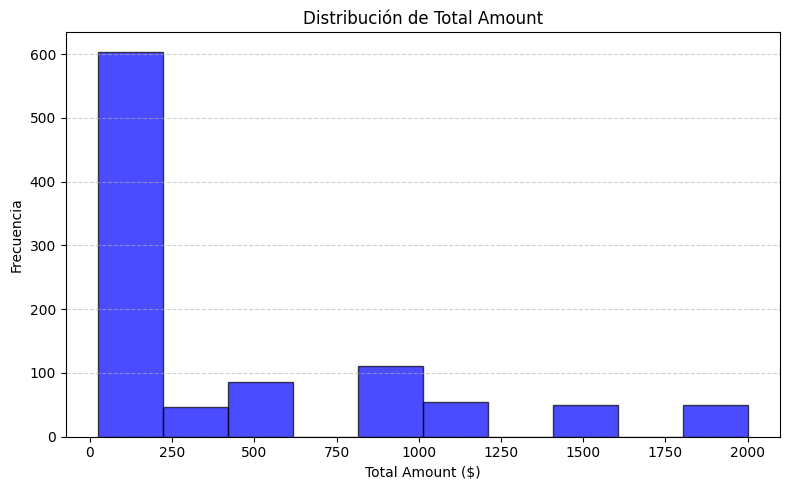

In [155]:
# Se genera un histograma con la variable total ventas

plt.figure(figsize=(8, 5))
plt.hist(df['total_amount'], bins=10, color='blue', edgecolor='black', alpha=0.7)

plt.title('Distribución de Total Amount')
plt.xlabel('Total Amount ($)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

**Analisis Histograma**

El grafico muestra una distribucion del monto total de ventas con una concentración fuerte en valores bajos agrupandose la mayoria ente 0 y 250 dolares. A medida que el los valores total de venta aumentan la frecuencia disminuye.

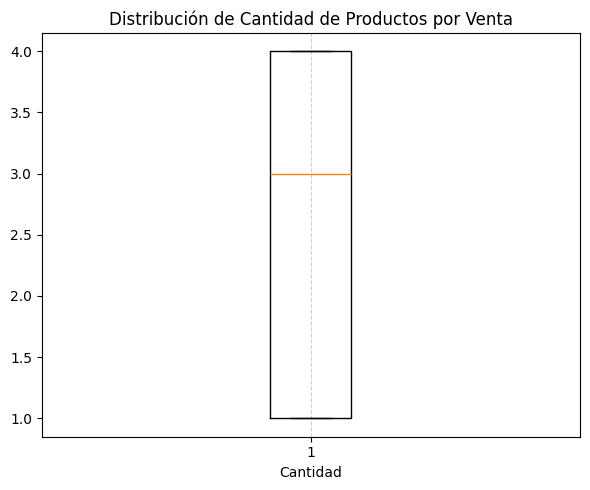

In [156]:
# Se genera un boxplot con la variable cantidad para conocer la distribución dede cantida de productos por venta

plt.figure(figsize=(6, 5))
plt.boxplot(df['quantity'])

plt.title('Distribución de Cantidad de Productos por Venta')
plt.xlabel('Cantidad')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

**Analisis Boxplot**

El grafico bloxplot que muestra la distribucion de la cantidad de productos por venta nos muestra que, la mediana es 3.0 lo que nos indica que la mitad de las ventas contienen a lo mas tres productos. por otro lado no existen valores atipicos y en general las ventas involucran pocas unidades de productos.

<function matplotlib.pyplot.show(close=None, block=None)>

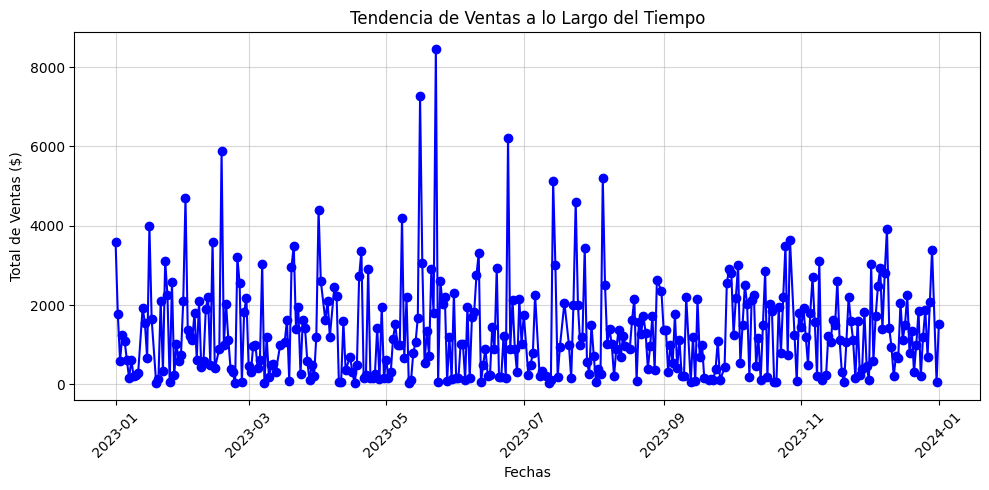

In [157]:
# Se genera grafico de lineas para mostrar la tendencia de las ventas a lo largo del tiempo

# Se convierte la columna date a datetime
df['date'] = pd.to_datetime(df['date'])

# Se agruoa las variables fecha y ventas totales
ventas_diarias = df.groupby('date')['total_amount'].sum().reset_index()
#ventas_diarias

plt.figure(figsize = (10,5))
plt.plot(ventas_diarias['date'], ventas_diarias['total_amount'], marker = 'o', color = 'blue')

plt.title('Tendencia de Ventas a lo Largo del Tiempo')
plt.xlabel('Fechas')
plt.ylabel('Total de Ventas ($)')
plt.grid(True, alpha = 0.5,)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show

**Analisis Grafico de Lineas**

El grafico de lineas nos muestra la tendencia de ventas a lo largo del tiempo, entre enero 2023 y enero 2024, nos permite visualizar una alta variabilidad diaria en las ventas, teniendo altos y bajos de manera constante. Alrrededor de mayo del 2023 se observa un pico en ventas que se acercan a 8.000 lo que nos podria hacer inferir que quizas fue cercana a una celebración, campaña o alguna promoción que haya existido.

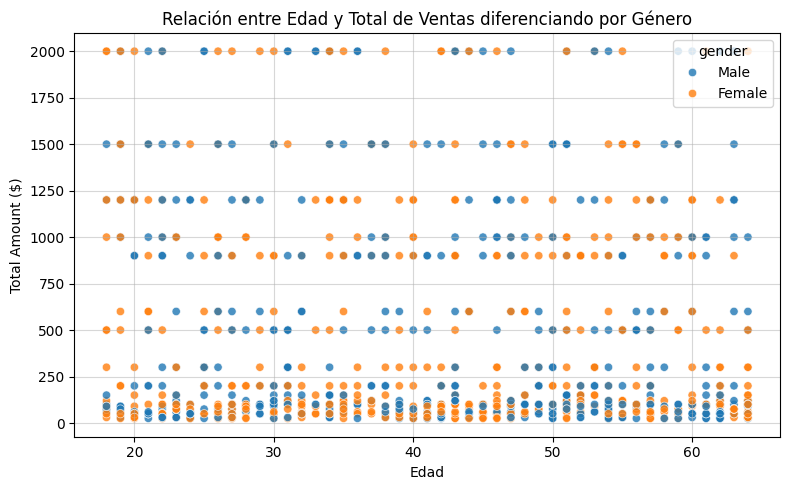

In [158]:
# Se crea grafico de dispersion para relacionar las variables edad, total ventas y genero

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='age', y='total_amount', hue='gender', alpha=0.8)

plt.title('Relación entre Edad y Total de Ventas diferenciando por Género')
plt.xlabel('Edad')
plt.ylabel('Total Amount ($)')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

**Analisis Grafico Dispersión**

Existe una concentración en los montos totales mas bajos, se ven puntos dispersos con montos totales altos. Finalmente los montos totales parecen variar mucho a lo largo de las edades y la distribucion entre genero parece estar equilibrada, sin dominancias.


<function matplotlib.pyplot.show(close=None, block=None)>

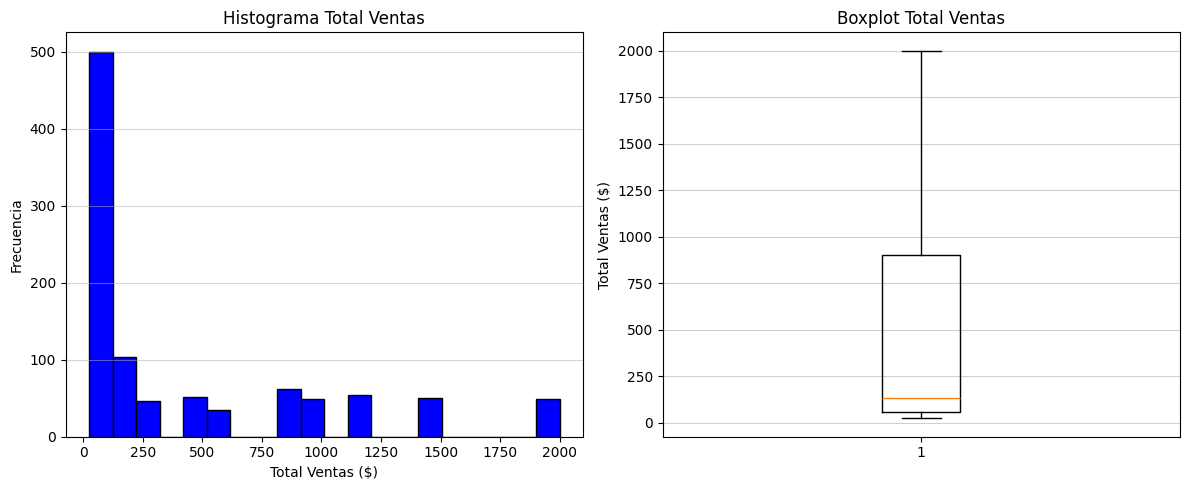

In [159]:
fig, axes = plt.subplots(1, 2, figsize = (12,5))

#Histograma Total Ventas
axes[0].hist(df['total_amount'], bins = 20, color = 'blue', edgecolor = 'black')
axes[0].set_title('Histograma Total Ventas')
axes[0].set_xlabel('Total Ventas ($)')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(axis = 'y', alpha = 0.5)

#Boxplot Total Ventas
axes[1].boxplot(df['total_amount'])
axes[1].set_title('Boxplot Total Ventas')
axes[1].set_ylabel('Total Ventas ($)')
axes[1].grid(axis = 'y', alpha = 0.6)

# Se muestran los graficos
plt.tight_layout()
plt.show

**Analisis Histograma y Boxplot**

Histograma:

la mayoria de las ventas se concentran en el rango más bajo, con una frecuencia que se acerca a las 500 veces.

A medida que aumentan los montos totales, la frecuencia disminuye, lo que indica una distribución sesgada hacia la derecha.

Boxplot:

El valor mediano se encuentra dentro del primer cuarto del rango total, reforzando la observación del histograma.

Existe poca variabilidad en la mitad central de los datos

No hay valores atípicos explícitos, por lo que los valores extremos están dentro del rango esperado.

**Visualización para ciencia de datos / Proyecto 1 – Parte V (Core)**

1. **Exploración de Datos Avanzada**

- Realiza un análisis de correlación y crea un mapa de calor para visualizar las relaciones entre las variables.

- Crea subplots para comparar diferentes variables clave.

- Añade cuadrículas, leyendas, anotaciones y flechas a tus gráficos para mejorar la claridad y la información.

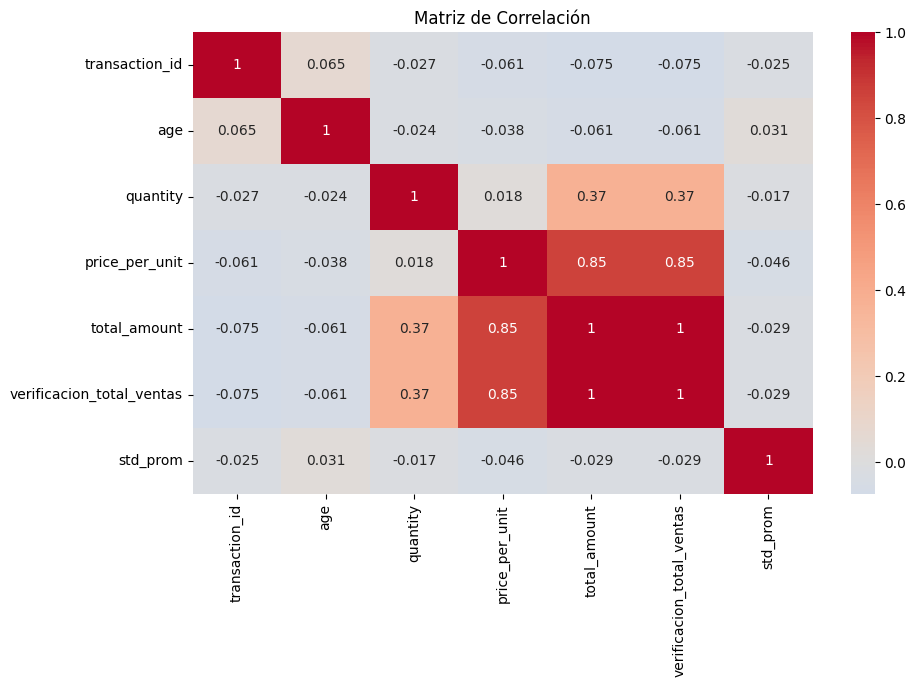

In [160]:
# Se filtran variables numéricas
columnas_numericas = df.select_dtypes(include=['int64', 'float64'])
# Calculamos la matriz de correlación
matriz_correlacion = columnas_numericas.corr()

# Se crea un heatmap para mejor visualizacion
plt.figure(figsize=(10,6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación")
plt.show()

### Analisis

La correlación más destacada es la perfecta relación entre total_amount y verificacion_total_ventas (1.00), lo que indica que ambas columnas contienen valores equivalentes. Pero como esta variable se hizo para verificar los calculos, es redundante por ende no se utilizará.

Otra correlación significativa se observa entre price_per_unit y total_amount, con un coeficiente cercano a 0.85. Esto confirma que el precio unitario de los productos tiene una fuerte influencia en el monto final de cada transacción. La misma relación se presenta entre price_per_unit y verificacion_total_ventas, reflejando la coherencia entre los cálculos, pero como se menciona anteriormente esta ultima es una variable de verificacion.

Por otro lado, la variable quantity presenta una correlación moderada (0.40) con el monto total, lo que nos indica que el número de unidades adquiridas contribuye al valor total, aunque no tanto como el precio por unidad. En otras palabras, transacciones con pocas unidades pero productos de alto valor tienen más peso en el total que compras con gran cantidad pero bajo precio.

En contraste, variables como age y transaction_id muestran una correlación débil o casi nula con el resto. En particular, la edad del cliente no presenta una relación lineal significativa con el comportamiento de compra.

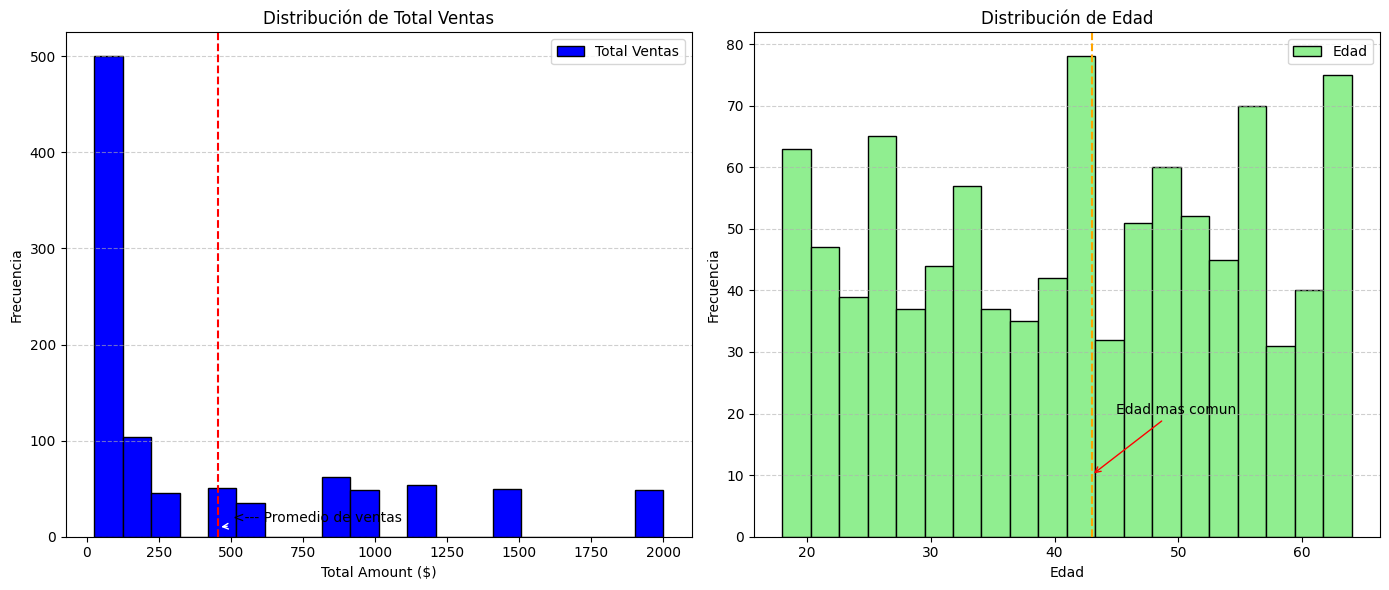

In [161]:
# Se crea subplots: 1 fila, 2 columnas

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma de total ventas
axes[0].hist(df['total_amount'], bins=20, color='blue', edgecolor='black', label='Total Ventas')

axes[0].set_title('Distribución de Total Ventas')
axes[0].set_xlabel('Total Amount ($)')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(axis='y', linestyle='--', alpha=0.6)
axes[0].legend()

# Anotacion: muestra promedio total de ventas
media_ventas = df['total_amount'].mean()
axes[0].axvline(media_ventas, color='red', linestyle='--', label=f'Media: {media_ventas}')
axes[0].annotate('<--- Promedio de ventas', xy=(media_ventas, 10), xytext=(media_ventas + 50, 15), arrowprops=dict(arrowstyle='->', color='white')) # posición de anotación


# Histograma de edad
axes[1].hist(df['age'], bins=20, color='lightgreen', edgecolor='black', label='Edad')

axes[1].set_title('Distribución de Edad')
axes[1].set_xlabel('Edad')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(axis='y', linestyle='--', alpha=0.6)
axes[1].legend()

# Anotacion: muestra la moda de edad
moda_edad = df['age'].mode()[0]
axes[1].axvline(moda_edad, color='orange', linestyle='--', label=f'Moda: {moda_edad}')
axes[1].annotate('Edad mas comun', xy=(moda_edad, 10), xytext=(moda_edad + 2, 20),arrowprops=dict(arrowstyle='->', color='red')) # posiciónn de la anotación

# Mostrar graficos
plt.tight_layout()
plt.show()

**Analisis subplot Histograma de variables Total Ventas y Edad**

Respecto a la distribución del total de ventas, como se habia planteado la mayor parte de las ventas esta concentrada oir debajo de 500 dolares, justo donde se marca la linea roja que indica el promedio, lo que nos indica que hay muchas ventas de montos bajos y pocas de montos altos.

En cuanto a la Distribución de Edad, nos muestra que la edad mas común es aproximadamente 40 años tan como indica la linea naranja demarcada en el gráfico y la mayoria de los clientes parece estar entre los30 y 50 años lo que nos serviría para plantear estrategias para este rango etario.

#PARTE FINAL DEL PROYECTO

## Preprocesamiento de Datos

In [162]:
# Consultamos nuevamente el dataset para recordar los Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   transaction_id               1000 non-null   int64         
 1   date                         1000 non-null   datetime64[ns]
 2   customer_id                  1000 non-null   object        
 3   gender                       1000 non-null   object        
 4   age                          1000 non-null   int64         
 5   product_category             1000 non-null   object        
 6   quantity                     1000 non-null   int64         
 7   price_per_unit               1000 non-null   int64         
 8   total_amount                 1000 non-null   int64         
 9   verificacion_total_ventas    1000 non-null   int64         
 10  clasificacion_cliente        1000 non-null   object        
 11  clasificacion_ventas         1000 non-null  

In [163]:
# Debido a que la varibale date es de tipo datetime, y necesitamos utilizarlas para los modelos predictivos, se generaran nuevas columnas desde este dato
df['date'].dtype

dtype('<M8[ns]')

In [164]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [165]:
# Se divide features y target
X = df.drop(columns=['total_amount'])
y = df['total_amount']

In [166]:
# Split. Dividir en train y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [167]:
# Se seleccionan columnas numericas y categoricas
columnas_categoricas = X.select_dtypes(include='object').columns
columnas_numericas = X.select_dtypes(include=['int64', 'float64']).columns

### MODELOS

#### REGRESION LINEAL

In [168]:
# Preprocesador.
preprocessorRL = ColumnTransformer([
    ("numericas", StandardScaler(), columnas_numericas),
    ("categoricas", OneHotEncoder(handle_unknown="ignore"), columnas_categoricas)
])

In [169]:
pipeline_reglin = Pipeline([
    ("preprocesador", preprocessorRL),
    ("regressor", LinearRegression())
])

In [170]:
# Entrenamiento
pipeline_reglin.fit(X_train, y_train)

# Predicciones
y_pred_rl = pipeline_reglin.predict(X_test)

# Cálculo de métricas
mae_rl = mean_absolute_error(y_test, y_pred_rl)
mse_rl = mean_squared_error(y_test, y_pred_rl)
rmse_rl = np.sqrt(mse_rl)
r2_rl = r2_score(y_test, y_pred_rl)



#### KNN REGRESSOR




In [171]:
# Preprocesador.
preprocessor_knn = ColumnTransformer([
    ("numericas", StandardScaler(), columnas_numericas),
    ("categoricas", OneHotEncoder(handle_unknown="ignore"), columnas_categoricas)
])

In [172]:
pipeline_knn = Pipeline(steps=[
    ("preprocesador", preprocessor_knn),
    ("regresor",KNeighborsRegressor())
])

In [173]:
# Entrenamiento
pipeline_knn.fit(X_train, y_train)

# Predicciones
y_pred_knn = pipeline_knn.predict(X_test)

# Cálculo de métricas
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

#### ARBOL DE DESICIONES

In [174]:
# Preprocesador.
preprocessor_tree = ColumnTransformer([
    ("numericas", StandardScaler(), columnas_numericas),
    ("categoricas", OneHotEncoder(handle_unknown="ignore"), columnas_categoricas)
])

In [175]:
pipeline_des_tree = Pipeline(steps=[
    ("preprocesador", preprocessor_tree),
    ("regresor",KNeighborsRegressor())
])

In [176]:
# Entrenamiento
pipeline_des_tree.fit(X_train, y_train)

# Predicciones
y_pred_arbol = pipeline_des_tree.predict(X_test)

# Cálculo de métricas
mae_tree = mean_absolute_error(y_test, y_pred_arbol)
mse_tree = mean_squared_error(y_test, y_pred_arbol)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_arbol)

#### RANDOM FOREST REGRESSOR

In [177]:
# Preprocesador.
preprocesador_rf = ColumnTransformer(transformers=[
    ('numericas', 'passthrough', columnas_numericas),
    ('categoricas', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), columnas_categoricas)
])

In [178]:
# Modelo RandomForest
pipeline_rf = Pipeline(steps=[
    ('preprocesamiento', preprocesador_rf),
    ('regresor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [179]:
# Entrenamiento
pipeline_rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = pipeline_rf.predict(X_test)

# Cálculo de métricas
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

### COMPARACION DE MODELOS



In [180]:
# Comparación entre modelos

comparacion = pd.DataFrame({
    'Modelo': ['Modelo Regresion Lineal', 'Knn Regressor', 'Arbol de Desiciones', 'Modelo RandomForest Regressor'],
    'MAE': [mae_rl, mae_knn, mae_tree, mae_rf],
    'MSE': [mse_rl, mse_knn, mse_tree, mse_rf],
    'RMSE':[rmse_rl, rmse_knn, rmse_tree, rmse_rf],
    'R²': [r2_rl, r2_knn, r2_tree, r2_rf]
})

print(comparacion)

                          Modelo        MAE          MSE       RMSE        R²
0        Modelo Regresion Lineal   1.752031     5.569528   2.359985  0.999981
1                  Knn Regressor  53.020000  6262.620000  79.136717  0.978606
2            Arbol de Desiciones  53.020000  6262.620000  79.136717  0.978606
3  Modelo RandomForest Regressor   0.000000     0.000000   0.000000  1.000000


### VALIDACION CRUZADA PARA EVALUAR EL RENDIMIENTO DE LOS MODELOS

In [187]:
# Evaluar regresion lineal

pipeline_rl = Pipeline(steps=[
    ('preprocessor', preprocessorRL),
    ('regressor', LinearRegression())
])

# Validación cruzada con scoring basado en R²
scores = cross_val_score(pipeline_rl, X, y, cv=5, scoring='r2') # función que genera una puntuación de precisión con validación cruzada para cada punto de datos de nuestro conjunto de datos

# Mostrar promedio y desvío
print(f"Regresión Lineal - R² promedio: {scores.mean():.4f})")

Regresión Lineal - R² promedio: 1.0000)


In [188]:
# Evaluar KNN

pipeline_knn = Pipeline(steps=[
    ("preprocesador", preprocessor_knn),
    ("regresor",KNeighborsRegressor())
])
# Validación cruzada con scoring de R²
scores_knn = cross_val_score(pipeline_knn, X, y, cv=5, scoring='r2') # función que genera una puntuación de precisión con validación cruzada para cada punto de datos de nuestro conjunto de datos

# Mostrar resultados
print(f"KNN Regressor - R² promedio: {scores_knn.mean():.4f}")



KNN Regressor - R² promedio: 0.9755


In [189]:
# Evaluar Arbol Forest
pipeline_des_tree = Pipeline(steps=[
    ("preprocesador", preprocessor_tree),
    ("regresor",KNeighborsRegressor())
])

# Validación cruzada
scores_tree = cross_val_score(pipeline_des_tree, X, y, cv=5, scoring='r2') # función que genera una puntuación de precisión con validación cruzada para cada punto de datos de nuestro conjunto de datos

# Resultados
print(f"Árbol de Decisión - R² promedio: {scores_tree.mean():.4f})")

Árbol de Decisión - R² promedio: 0.9755)


In [190]:
# Evaluar Random Forest
pipeline_rf = Pipeline(steps=[
    ('preprocesamiento', preprocesador_rf),
    ('regresor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Validación cruzada con scoring de R²
scores_rf = cross_val_score(pipeline_rf, X, y, cv=5, scoring='r2') # función que genera una puntuación de precisión con validación cruzada para cada punto de datos de nuestro conjunto de datos

# Mostrar resultados
print(f"Random Forest Regressor - R² promedio: {scores_rf.mean():.4f}")

Random Forest Regressor - R² promedio: 1.0000


Al comparar los modelos podemos determinar que:
- Random Forest y Regresión Lineal muestran puntuaciones casi perfectas, tanto en el test como en validación cruzada lo que nos indica que están generalizando muy bien.
- KNN y Árbol tienen una performance decente, pero ligeramente inferior.
- La validaciones con validacion cruzada confirman de cierta menera la estabilidad de los modelos generados.